# Explore results from 500m MIKE SHE Skjern model

### **Output Files**

Outputs from a MIKE SHE simulation are in a variety of formats. The following descriptions are from [MIKE Web Help > Output Files](https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/MIKE_SHE_online/Working_with_Results/Output_Files.htm).

- **.sheres** — ASCII file that is a catalogue of all the output files associ­ated with a simulation.
- **.hot.sheres** — reduced version of the .sheres file for hot starting only.
- **.frf** — binary output file containing all of the static information on the simulation, as well as all of the time series results that cannot be easily stored in a dfs format.
- **.dfs0, .dfs2, .dfs3** — binary time series format. Each file can contain multi­ple output items, but each of the items must be stored at the same time step interval. 

Here we will focus on dfs outputs and show how to visualize a few here. More detail on each of the outputs are described here [MIKE Web Help](https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/MIKE_SHE_online/MSHE_Getting_started/Getting_Started.htm), under sections [Output Files](https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/MIKE_SHE_online/Working_with_Results/Output_Files.htm) and [Output Items](https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/MIKE_SHE_online/Working_with_Results/Output_Items.htm)

The filenames and the variables they contain are listed in the [MIKE SHE Web Help Appendix A](https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/index.htm#MIKE_SHE_online/AppendixA/Appendix.htm#XREF_90729_A_1_MIKE_SHE)

### **Water Balance Tool Output**

The MIKE Zero [Water Balance Tool](https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/MIKE_SHE_online/Water_Balance/Using_the_Water_Balance_Tool.htm) post-processes the results from the MIKE SHE simulations and creates water balance summaries for the individual components (fx. Overland Flow (OF), Saturated Zone (SZ), Unsaturated Zone (UZ), Irrigation, etc.)

The Water Balance Tool is part of the MIKE Zero toolbox. Here we will plot some of the outputs created in the tool's GUI. More details on how to use the Water Balance Tool are shown at [MIKE SHE Web Help](https://doc.mikepoweredbydhi.help/webhelp/2025/mikeshe/MIKE_SHE_online/Water_Balance/Creating_a_water_balance.htm)

*Note: The values in the water balance are in the EUM unit type (here, mm) Storage Depth. These storage depths can be converted to volumes by multiplying by the internal model area, found in the _WM_PRINT.LOG file.*


In [1]:
import mikeio
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gpd
import tools


In [2]:
# reslts folder
res_folder = r"..\output_sample\mshe_output"  # where the results are stored

In [9]:
# ---------------------- Read a sample file to see the structure and variable names ----------------------
dfs2 =mikeio.read(r"..\output_sample\mshe_output\Skjern_500m_ET_UzCells.dfs2")
print(dfs2)

dfs3 = mikeio.read(r"..\output_sample\mshe_output\Skjern_500m_3DSZflow.dfs3")
print(dfs3[0])

<mikeio.Dataset>
dims: (time:782, y:140, x:180)
time: 1990-01-02 06:00:00 - 2019-12-10 06:00:00 (782 records)
geometry: Grid2D (ny=140, nx=180)
items:
  0:  actual evapotranspiration <Evapotranspiration Rate> (mm per day) - 3
  1:  actual transpiration <Evapotranspiration Rate> (mm per day) - 3
  2:  actual evaporation from interception <Evapotranspiration Rate> (mm per day) - 3
  3:  actual evaporation from ponded water <Evapotranspiration Rate> (mm per day) - 3
  4:  canopy interception storage <Interception> (millimeter)
  5:  evapotranspiration from SZ <Evapotranspiration Rate> (mm per day) - 3
<mikeio.DataArray>
name: groundwater flow in x-direction
dims: (time:782, z:8, y:140, x:180)
time: 1990-01-02 06:00:00 - 2019-12-10 06:00:00 (782 records)
geometry: Grid3D(nz=8, ny=140, nx=180)



<Axes: title={'center': 'Groundwater flux in z-direction AVG 1990-01-02 to 2019-12-10, L4'}>

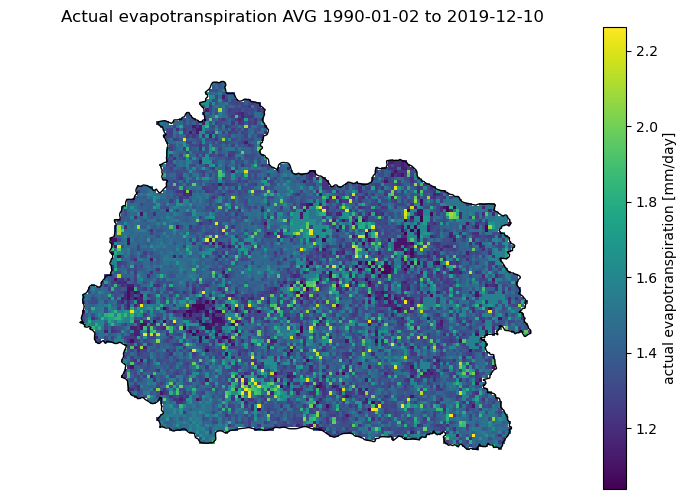

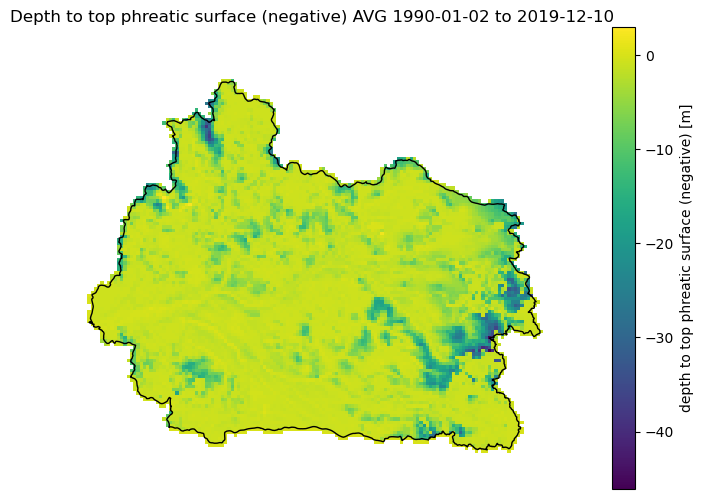

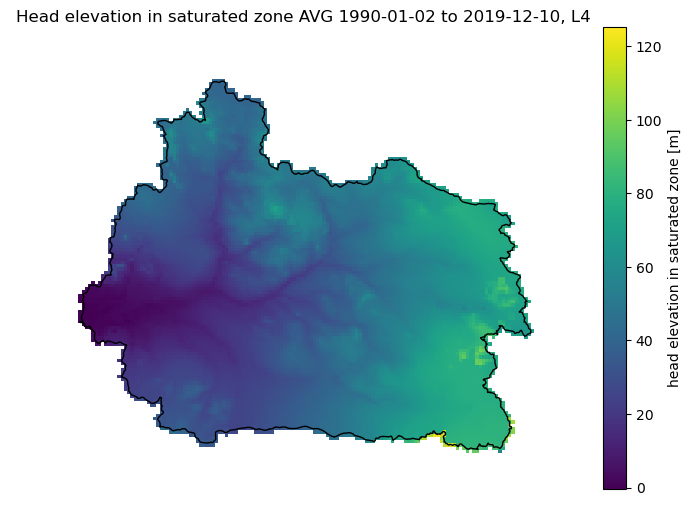

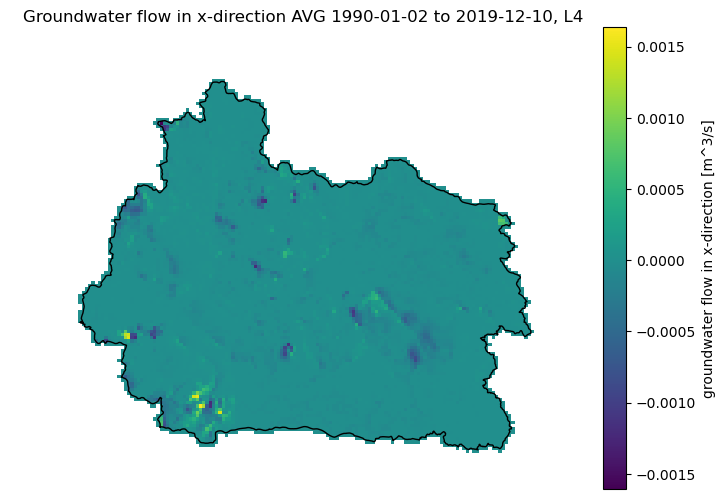

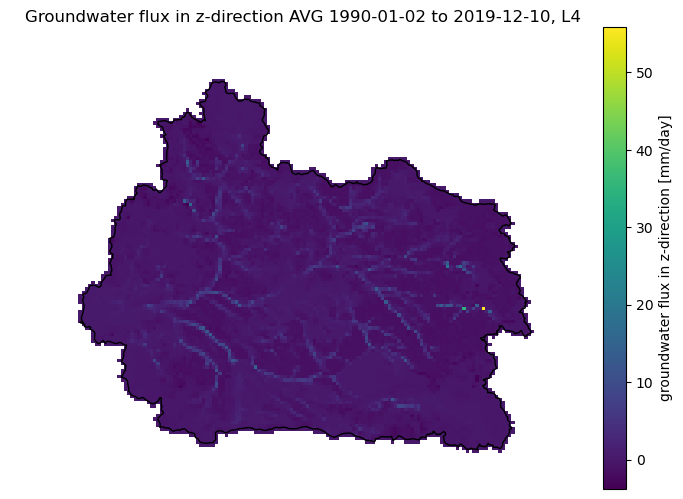

In [6]:
# ---------------------- View some gridded results (looking top down - ET, phreatic depth, head elevation, groundwater movement) ----------------------

domain_shp = gpd.read_file(r"..\input\domain\Skjern.shp")
# Time range for averaging
t1 = '1990-01-02'
t2 = '2019-12-10'

# Actual evapotranspiration
tools.plot_dfs2_output(r"..\output_sample\mshe_output\Skjern_500m_ET_UzCells.dfs2", varname='actual evapotranspiration', time1=t1, time2=t2, ax=None, shapefile=domain_shp)

# depth to phreatic surface (negative)
tools.plot_dfs2_output(r"..\output_sample\mshe_output\Skjern_500m_2DSZ.dfs2", varname='depth to top phreatic surface (negative)', time1=t1, time2=t2, ax=None, shapefile=domain_shp,layerID=4)

# head elevation in saturated zone (Choose main aquifer based on layer statistics)
tools.plot_dfs2_output(r"..\output_sample\mshe_output\Skjern_500m_3DSZ.dfs3", varname='head elevation in saturated zone', time1=t1, time2=t2, ax=None, shapefile=domain_shp,layerID=4)

# Groundwater flow in x,y,z direction
tools.plot_dfs2_output(r"..\output_sample\mshe_output\Skjern_500m_3DSZflow.dfs3", varname='groundwater flow in x-direction', time1=t1, time2=t2, ax=None, shapefile=domain_shp,layerID=4)

# Groundwater flux in z direction
tools.plot_dfs2_output(r"..\output_sample\mshe_output\Skjern_500m_3DSZflow.dfs3", varname='groundwater flux in z-direction', time1=t1, time2=t2, ax=None, shapefile=domain_shp,layerID=4)

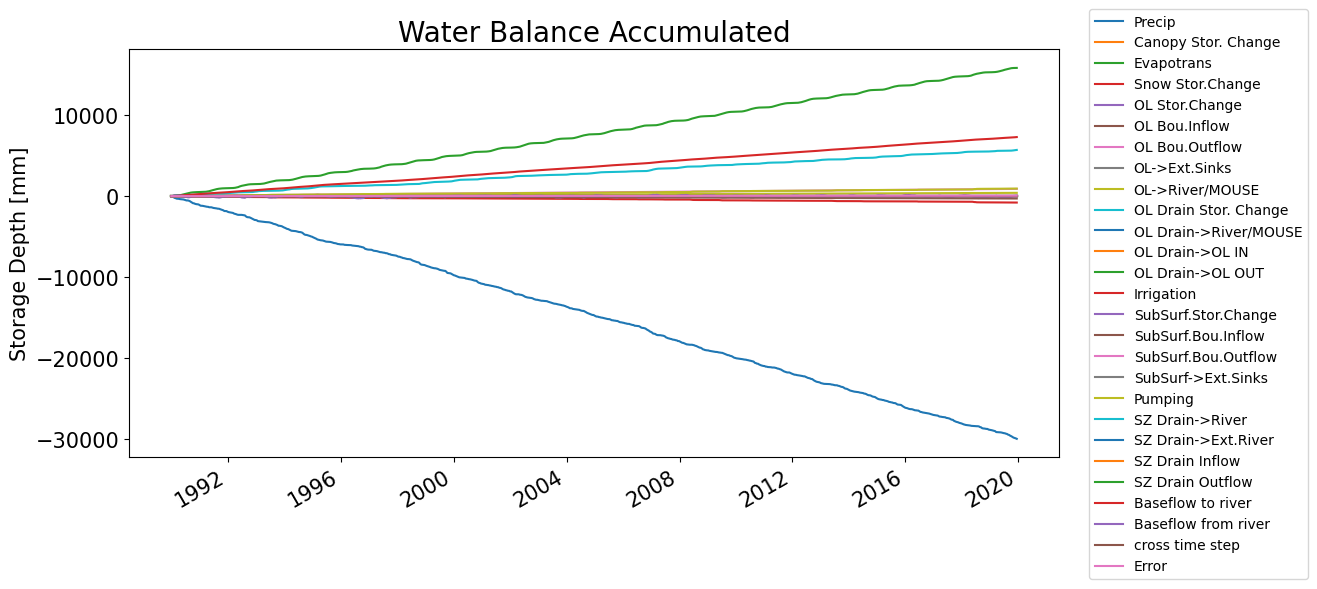

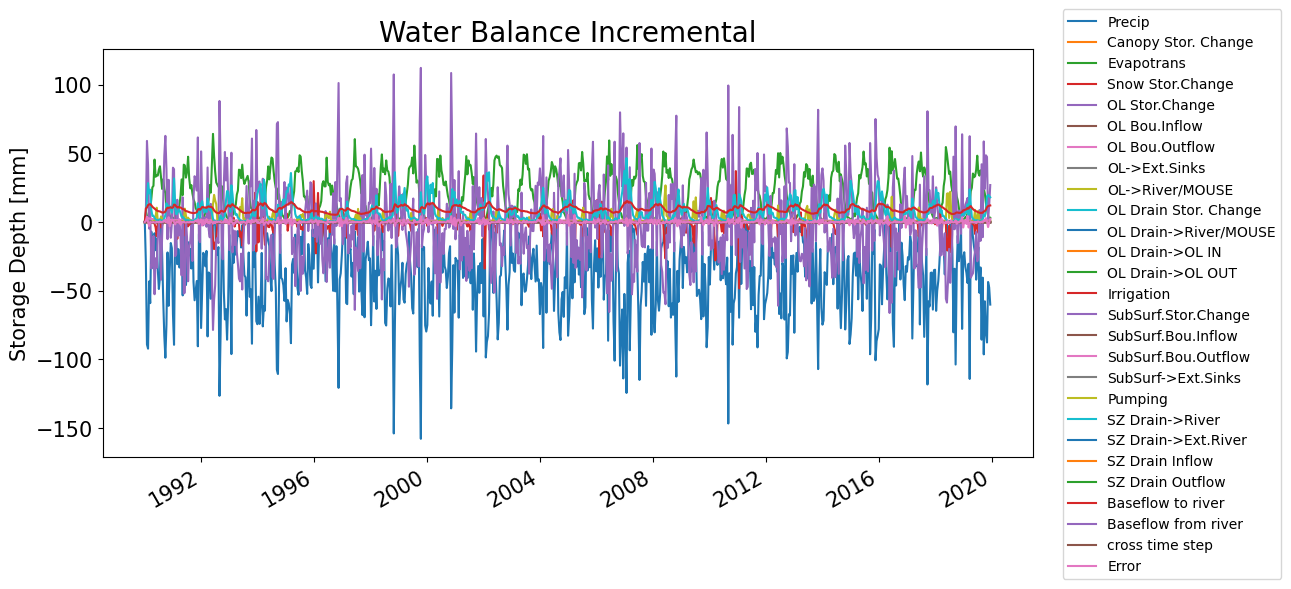

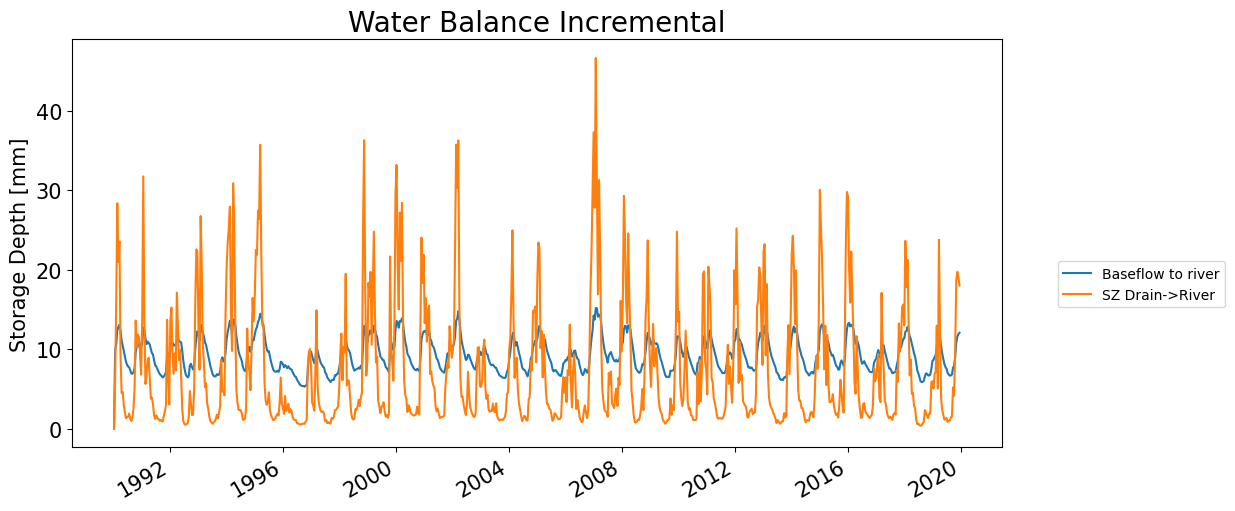

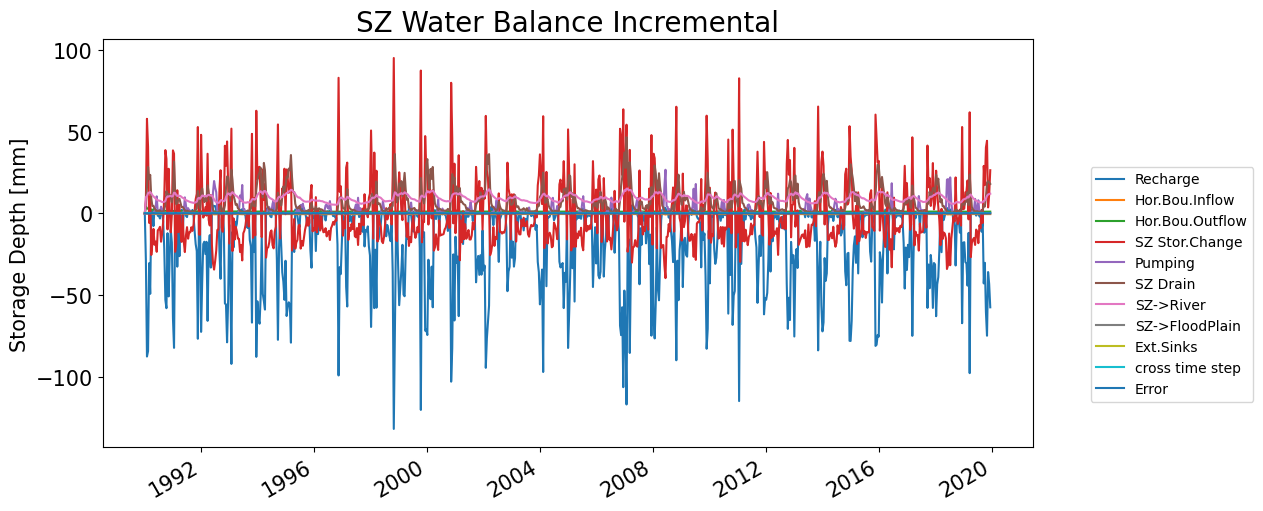

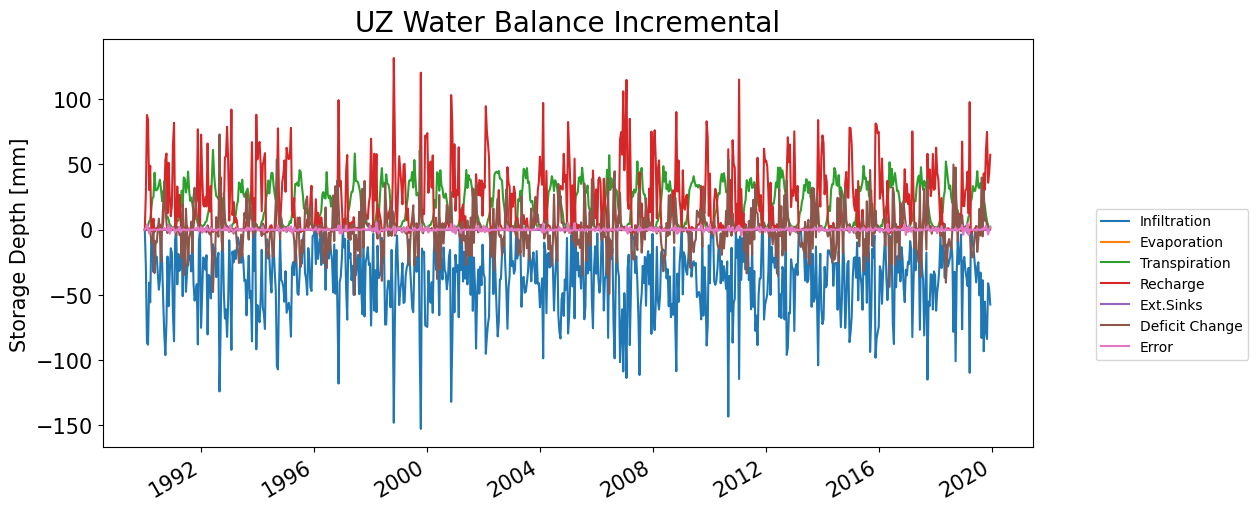

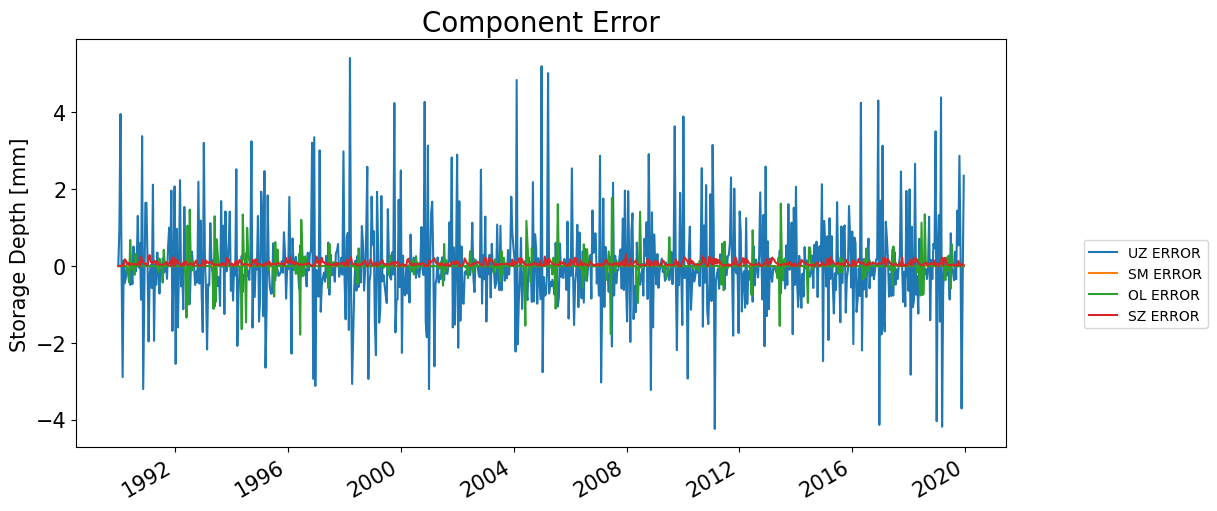

In [8]:
# ---------------------- Open water balance file (Output from the MIKE Zero Water Balance Tool) ----------------------

# Total accumulated
tools.plot_wb_output(r"..\output_sample\waterbalance_output\wb_accumulated.dfs0",'Water Balance Accumulated')

# Total incremental
tools.plot_wb_output(r"..\output_sample\waterbalance_output\wb_incremental.dfs0",'Water Balance Incremental')
# look only at baseflow river and SZ drain to river
varlist = ['Baseflow to river','SZ Drain->River']
tools.plot_wb_output(r"..\output_sample\waterbalance_output\wb_incremental.dfs0",'Water Balance Incremental',varlist=varlist)

# Saturated zone incremental
tools.plot_wb_output(r"..\output_sample\waterbalance_output\wb_SZ_incremental.dfs0",'SZ Water Balance Incremental')

# Unsaturated zone incremental
tools.plot_wb_output(r"..\output_sample\waterbalance_output\wb_UZ_incremental.dfs0",'UZ Water Balance Incremental')

# Water balance errors - positive errors indicate the model is generating water
tools.plot_wb_output(r"..\output_sample\waterbalance_output\wb_component_error.dfs0",'Component Error',varlist=['UZ ERROR','SM ERROR','OL ERROR','SZ ERROR'])

